In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('Outputs/packets-2017.05.17-processed')
type(df)

pandas.core.frame.DataFrame

In [40]:
pd.set_option("display.max.columns", None)
df.head()

,id,proto,srcip,dstip,srcport,shannon,bien,tbien
0,9-fmu3sBoMUFiBGPrEs-,tcp,192.168.200.135,192.168.200.21,2000,2.152079,0.952980,0.959673
1,_-fmu3sBoMUFiBGPrEs_,tcp,192.168.200.135,192.168.200.21,2000,3.219723,0.952886,0.997561
2,Aefmu3sBoMUFiBGPrEw_,tcp,192.168.200.135,192.168.200.21,2000,3.023888,0.920563,0.996206
3,A-fmu3sBoMUFiBGPrEw_,tcp,192.168.200.135,192.168.200.21,2000,3.065445,0.951387,0.996682
4,Befmu3sBoMUFiBGPrEw_,tcp,192.168.200.135,192.168.200.21,2000,3.251311,0.953171,0.997514


In [41]:
%matplotlib inline

<AxesSubplot:xlabel='id'>

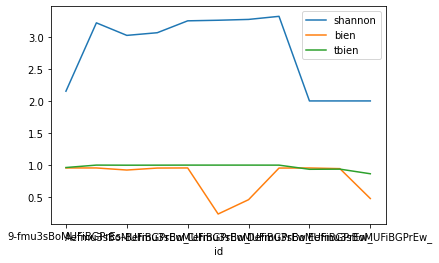

In [42]:
df.plot(x='id', y=['shannon','bien','tbien'])